In [77]:
from __future__ import absolute_import, division, print_function
from matplotlib.font_manager import _rebuild; _rebuild()
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

#Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas
import scipy.io as spio
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn import svm

tf.logging.set_verbosity(tf.logging.INFO)

In [78]:
"""Load the dataset and set randomness."""

# Initialize random number generator for reproducibility.
seed = 7
np.random.seed(seed)

# Load in dataset.
data = spio.loadmat("features_10s_2019-01-30.mat");
features = data['features'];
labels = data['labels_features'];
animal_id_features = data['animal_id_features'];

# Flatten animal IDs so we can slice by animal.
id_features = np.ravel(animal_id_features);

# Count number of features per animal label.
features_per_animal = np.bincount(id_features);

# Get only features corresponding to first animal.
fKH41_num_samples = features_per_animal[1];
fKH41_features = features[1:fKH41_num_samples];

# Get only labels corresponding to first animal's features.
fKH41_labels = labels[:,1:fKH41_num_samples];
fKH41_labels = fKH41_labels.transpose();

In [79]:
print(fKH41_labels.shape)

(96665, 1)


In [80]:
"""Reduce the number of classes: delete the seizures"""
# Method 1

a = np.where(fKH41_labels == 2)

fKH41_labels_tmp = np.delete(fKH41_labels, a)
fKH41_features_tmp = np.delete(fKH41_features, a, 0);
fKH41_labels = fKH41_labels_tmp
fKH41_features = fKH41_features_tmp

print(fKH41_labels.shape)
print(fKH41_features.shape)

(96115,)
(96115, 141)


In [81]:
"""Reduce the number of classes: delete the seizures"""
# Method 2

# for i in range(len(fKH41_labels)):
#     if fKH41_labels[i] == 2:
#         fKH41_labels_tmp = np.delete(fKH41_labels, i)
#         fKH41_features_tmp = np.delete(fKH41_features, i, 0);
# fKH41_labels = fKH41_labels_tmp
# fKH41_features = fKH41_features_tmp





'Reduce the number of classes: delete the seizures'

In [82]:
"""Split data into training and testing for cross-validation."""
data_train, data_test, labels_train, labels_test = train_test_split(fKH41_features, fKH41_labels, test_size=0.20, random_state=seed);

In [83]:
"""Shuffling the data to train/test on smaller subsets"""
shuffled_data_train = np.empty(data_train.shape, dtype=data_train.dtype)
shuffled_labels_train = np.empty(labels_train.shape, dtype=labels_train.dtype)
permutation = np.random.permutation(len(labels_train))
for old_index, new_index in enumerate(permutation):
        shuffled_data_train [new_index] = data_train[old_index]
        shuffled_labels_train[new_index] = labels_train[old_index]
data_train = shuffled_data_train
labels_train = shuffled_labels_train

"""Shuffling the data to train/test on smaller subsets"""
shuffled_data_test = np.empty(data_test.shape, dtype=data_test.dtype)
shuffled_labels_test = np.empty(labels_test.shape, dtype=labels_test.dtype)
permutation = np.random.permutation(len(labels_test))
for old_index, new_index in enumerate(permutation):
        shuffled_data_test [new_index] = data_test[old_index]
        shuffled_labels_test[new_index] = labels_test[old_index]
data_test = shuffled_data_test
labels_test = shuffled_labels_test
    

In [84]:
"""Reducing the size of the vectors for easier computation"""
factor = 20

data_train = data_train[0:int(len(data_train)/factor),:]
labels_train = labels_train[0:np.int(len(labels_train)/factor)]

data_test = data_test[0:int(len(data_test)/factor),:]
labels_test = labels_test[0:np.int(len(labels_test)/factor)]

In [85]:
"""Reducing the number of features as well"""
features_kept = 70
data_train = data_train[:,0:features_kept]
data_test = data_test[:,0:features_kept]

In [86]:
print(labels_train.shape)
print(labels_test.shape)

(3844,)
(961,)


In [87]:
"""Define the SVM model """

clf = svm.SVC(gamma='scale')
 
#clf = svm.LinearSVC()

In [88]:
y_score = clf.fit(data_train, labels_train)  

In [89]:
y_predict = clf.predict(data_test)
y_predict_train = clf.predict(data_train)

In [90]:
print("Accuracy test set:",metrics.accuracy_score(labels_test, y_predict))
print("Accuracy train set:",metrics.accuracy_score(labels_train, y_predict_train))

Accuracy test set: 0.7460978147762747
Accuracy train set: 0.7565036420395421


In [91]:
confusion_matrix(labels_test, y_predict) 

array([[362, 148],
       [ 96, 355]], dtype=int64)

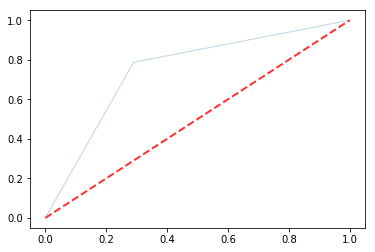

In [94]:
"""Run a ROC and display AUC"""
from sklearn.metrics import roc_curve, auc
from scipy import interp

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)


# probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])


# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(labels_test, y_predict)
tprs.append(interp(mean_fpr, fpr, tpr))
tprs[-1][0] = 0.0
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
plt.plot(fpr, tpr, lw=1, alpha=0.3,
         label='ROC')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

In [ ]:
"""Using a PCA to keep relevant features"""
from sklearn.decomposition import PCA




pca = PCA(n_components=2)
pca.fit(X)